<a href="https://colab.research.google.com/github/txcagla/techcareer-assignments/blob/main/bitirme-projesi/k_means_k%C3%BCmeleme_%C3%B6devi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# gerekli kütüphaneleri import etme
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [12]:
# Veri setini yükle
data = pd.read_csv('/content/dava.csv')

In [13]:
#ilk beş satırı görüntüleme
data.head()

,Unnamed: 0,Case Duration (Days),Number of Witnesses,Legal Fees (USD),Number of Evidence Items,Severity,Outcome
0,0,132,8,35206,49,2,0
1,1,300,12,46106,46,2,1
2,2,136,2,16411,31,1,1
3,3,101,1,7911,35,1,0
4,4,218,16,6734,33,1,0


In [14]:
# 1. GÖREV: Kümeleme için uygun özellikleri seçme

# 'Outcome' kümeleme için uygun değil çünkü bir target'ı temsil eder.
# K-means modelinde sadece features üzerinden çalışır yani etiket kullanılmaz.
features = ['Case Duration (Days)', 'Number of Witnesses',
            'Legal Fees (USD)', 'Number of Evidence Items', 'Severity']

X = data[features]

# Özelliklerin ölçeklendirilmesi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

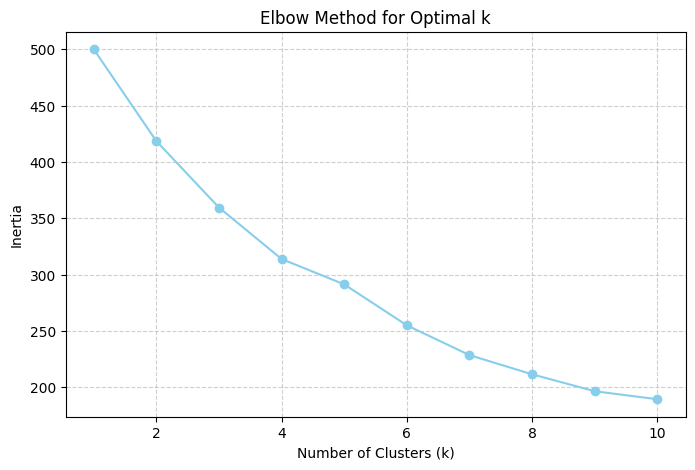

In [15]:
# 2. GÖREV: Elbow Yöntemi ile Optimal Küme Sayısını Belirleme

inertia_values = []  # her k için küme içi hata kareleri toplamı

# k değerlerini 1–10 arasında test etme
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia_values.append(kmeans.inertia_)

# Elbow grafiği
plt.figure(figsize=(8,5))
plt.plot(range(1, 11), inertia_values, marker='o', color='skyblue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [16]:
# 3. GÖREV: K-Means Algoritması ile Kümeleme

# elbow grafiğine göre k=3 olsun
optimal_k = 3
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_model.fit_predict(X_scaled)

# Küme etiketlerini veriye ekleme
data['Cluster'] = clusters

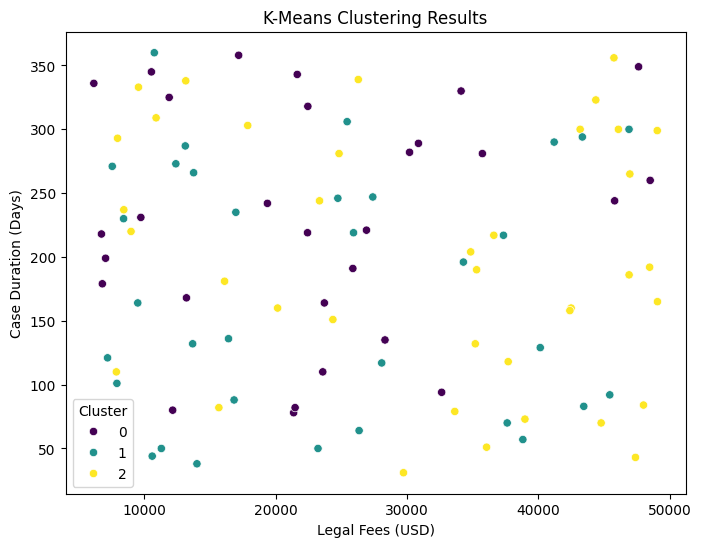


Küme Merkezleri (Gerçek Ölçeklerde):

   Case Duration (Days)  Number of Witnesses  Legal Fees (USD)  \
0            230.034483            15.103448      22903.724138   
1            174.939394             4.242424      23644.242424   
2            199.394737             7.894737      31545.157895   

   Number of Evidence Items  Severity  
0                 26.206897  1.379310  
1                 23.212121  1.303030  
2                 29.263158  2.631579  

Kümelere Göre Ortalama Değerler:

         Case Duration (Days)  Number of Witnesses  Legal Fees (USD)  \
Cluster                                                                
0                      230.03                15.10          22903.72   
1                      174.94                 4.24          23644.24   
2                      199.39                 7.89          31545.16   

         Number of Evidence Items  Severity  
Cluster                                      
0                           26.21      1.38  
1 

In [17]:
# 4. GÖREV: Sonuçların Görselleştirilmesi

# 2B görselleştirme (örnek: Legal Fees vs Case Duration)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=data['Legal Fees (USD)'],
    y=data['Case Duration (Days)'],
    hue=data['Cluster'],
    palette='viridis'
)
plt.title('K-Means Clustering Results')
plt.xlabel('Legal Fees (USD)')
plt.ylabel('Case Duration (Days)')
plt.legend(title='Cluster')
plt.show()

# Küme merkezlerini inceleme
centers = pd.DataFrame(scaler.inverse_transform(kmeans_model.cluster_centers_), columns=features)
print("\nKüme Merkezleri (Gerçek Ölçeklerde):\n")
print(centers)

# Küme bazında ortalama değerleri tablo olarak gösterme
cluster_summary = data.groupby('Cluster')[features].mean().round(2)
print("\nKümelere Göre Ortalama Değerler:\n")
print(cluster_summary)